In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

X = np.array([[0,0], [0,1], [1,0], [1,1]])
X

Instructions for updating:
non-resource variables are not supported in the long term


array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [2]:
y = np.array([[1], [0], [0], [1]])
y

array([[1],
       [0],
       [0],
       [1]])

In [3]:
neuronios_entrada = 2
neuronios_oculta = 3
neuronios_saida = 1

In [4]:
W = {'oculta': tf.Variable(tf.random_normal([neuronios_entrada, neuronios_oculta]), name = 'w_oculta'), 
     'saida': tf.Variable(tf.random_normal([neuronios_oculta, neuronios_saida]), name = 'w_saida')}

In [5]:
type(W)

dict

In [6]:
type(W['oculta'])

tensorflow.python.ops.variables.RefVariable

In [7]:
W['oculta']

<tf.Variable 'w_oculta:0' shape=(2, 3) dtype=float32_ref>

In [8]:
W['saida']

<tf.Variable 'w_saida:0' shape=(3, 1) dtype=float32_ref>

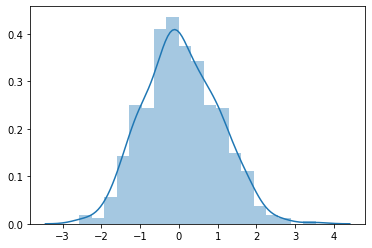

In [9]:
distribuicao = np.random.normal(size = 500)
#distribuicao
import seaborn as sns
%matplotlib inline
sns.distplot(distribuicao)

In [10]:
b = {'oculta': tf.Variable(tf.random_normal([neuronios_oculta]), name = 'b_oculta'),
     'saida': tf.Variable(tf.random_normal([neuronios_saida]), name = 'b_saida')}

In [11]:
xph = tf.placeholder(tf.float32, [4, neuronios_entrada], name = 'xph')
yph = tf.placeholder(tf.float32, [4, neuronios_saida], name = 'yph')

In [12]:
camada_oculta = tf.add(tf.matmul(xph, W['oculta']), b['oculta'])
camada_oculta_ativacao = tf.sigmoid(camada_oculta)
camada_saida = tf.add(tf.matmul(camada_oculta_ativacao, W['saida']), b['saida'])
camada_saida_ativacao = tf.sigmoid(camada_saida)
erro = tf.losses.mean_squared_error(yph, camada_saida_ativacao)
otimizador = tf.train.GradientDescentOptimizer(learning_rate = 0.3).minimize(erro)

In [13]:
init = tf.global_variables_initializer()

In [14]:
with tf.Session() as sess:
    sess.run(init)
    #print(sess.run(W['oculta']))
    #print(sess.run(W['saida']))
    #print(sess.run(b['oculta']))
    #print('\n')
    #print(sess.run(b['saida']))
    #print(sess.run(camada_oculta, feed_dict = {xph: X}))
    #print(sess.run(camada_oculta_ativacao, feed_dict = {xph: X}))
    #print(sess.run(camada_saida, feed_dict = {xph: X}))
    #print(sess.run(camada_saida_ativacao, feed_dict = {xph: X}))
    for epocas in range(10000):
        erro_medio = 0
        _, custo = sess.run([otimizador, erro], feed_dict = {xph: X, yph: y})
        if epocas % 200 == 0:
            #print(custo)
            erro_medio += custo / 4
            print(erro_medio)
    W_final, b_final = sess.run([W, b])
            

0.08802999556064606
0.062439948320388794
0.062157146632671356
0.06165962666273117
0.06051671504974365
0.058125488460063934
0.05430309474468231
0.049868859350681305
0.045702673494815826
0.04180563613772392
0.03601688891649246
0.02552635967731476
0.016998600214719772
0.011361793614923954
0.007960902526974678
0.00589490681886673
0.004579809494316578
0.0036968120839446783
0.003074582200497389
0.0026178110856562853
0.002270932774990797
0.0020000063814222813
0.0017833774909377098
0.0016067211981862783
0.0014602276496589184
0.0013369882944971323
0.001232017413713038
0.001141632441431284
0.0010630593169480562
0.0009941782336682081
0.0009333411580882967
0.0008792437147349119
0.0008308462565764785
0.0007873120484873652
0.0007479586056433618
0.0007122192764654756
0.0006796267698518932
0.000649792724289
0.000622386927716434
0.0005971264909021556
0.0005737760802730918
0.0005521297571249306
0.0005320096388459206
0.0005132617661729455
0.000495754589792341
0.00047936919145286083
0.00046400324208661914

In [15]:
W_final

{'oculta': array([[ 5.8184395,  4.112019 , -5.154493 ],
        [-2.5236344,  4.801208 ,  6.487263 ]], dtype=float32),
 'saida': array([[ 7.066232 ],
        [-7.0903845],
        [ 7.084602 ]], dtype=float32)}

In [16]:
b_final

{'oculta': array([ 0.08717326, -0.6533242 ,  2.386172  ], dtype=float32),
 'saida': array([-3.7530556], dtype=float32)}

In [17]:
# teste
camada_oculta_teste = tf.add(tf.matmul(xph, W_final['oculta']), b_final['oculta'])
camada_oculta_ativacao_teste = tf.sigmoid(camada_oculta_teste)
camada_saida_teste = tf.add(tf.matmul(camada_oculta_ativacao_teste, W_final['saida']), b_final['saida'])
camada_saida_ativacao_teste = tf.sigmoid(camada_saida_teste)

In [18]:
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(camada_saida_ativacao_teste, feed_dict = {xph: X}))

[[0.9819286 ]
 [0.04388971]
 [0.04063455]
 [0.9482998 ]]
